## Using Moore's law 

In [399]:
##transistor_count = e** Asub(M x year) + Bsub(M)


In [400]:
# From the theory we know that Am = 0.3466, Bm=-675.4
import numpy as np

A_M = np.log(2)/2
B_M = np.log(2250) - A_M * 1971
Moores_law = lambda year: np.exp(B_M) * np.exp(A_M * year)

In [401]:
# In 1971 there were 2250 transistors on the intel 4004 chip. Use Moores_law to check the number of semiconductors Gordon Moore would expect in 1973


ML_1971 = Moores_law(1971)
ML_1973 = Moores_law(1973)
print("In 1973, G.Moore expects {:.0f} transistors in Intels  chips".format(ML_1973))
print("This is x{:.2f} more transistors than 1971".format(ML_1973/ML_1971))

In 1973, G.Moore expects 4500 transistors in Intels  chips
This is x2.00 more transistors than 1971


In [402]:
from bs4 import BeautifulSoup as bs

In [403]:
import requests

url = requests.get('https://en.wikipedia.org/wiki/Transistor_count#Microprocessors')

In [404]:
soup = bs(url.content, 'html.parser')

In [405]:
table  = soup.find('table', class_="wikitable sortable")

In [406]:
body = table.find_all('tr')

In [407]:
body

[<tr>
 <th width="300px"><a href="/wiki/Microprocessor" title="Microprocessor">Processor</a>
 </th>
 <th data-sort-type="number" width="130px">Transistor count
 </th>
 <th>Year
 </th>
 <th>Designer
 </th>
 <th data-sort-type="number"><a href="/wiki/Semiconductor_device_fabrication" title="Semiconductor device fabrication">Process</a><br/>(<a href="/wiki/Nanometre" title="Nanometre">nm</a>)
 </th>
 <th data-sort-type="number">Area (<a href="/wiki/Millimetre" title="Millimetre">mm</a><sup>2</sup>)
 </th>
 <th data-sort-type="number">Transistor<br/>density<br/>(tr./mm<sup>2</sup>)
 </th></tr>,
 <tr>
 <td><a class="mw-redirect" href="/wiki/MP944" title="MP944">MP944</a> (20-bit, 6-chip, 28 chips total)
 </td>
 <td>74,442 (5,360 excl. ROM &amp; RAM)<sup class="reference" id="cite_ref-15"><a href="#cite_note-15">[15]</a></sup><sup class="reference" id="cite_ref-16"><a href="#cite_note-16">[16]</a></sup>
 </td>
 <td>1970<sup class="reference" id="cite_ref-F-14_13-1"><a href="#cite_note-F-14-1

In [408]:
table_body = []
for row in body:
    cells = row.find_all('td')
    table_body.append([cell.text for cell in cells])

In [409]:
import csv
with open('microprocessor.csv','w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    for row in table_body:
        writer.writerow(row)

In [410]:
import pandas as pd
data = pd.read_csv('microprocessor.csv',header=None)
data.columns= ['Processor','Transistor_count','Year','Designer','Fab','Process','Area']

In [411]:
data.head()

,Processor,Transistor_count,Year,Designer,Fab,Process,Area
0,"MP944 (20-bit, 6-chip, 28 chips total)\n","74,442 (5,360 excl. ROM & RAM)[15][16]\n",1970[13][a]\n,Garrett AiResearch\n,?\n,?\n,?\n
1,"Intel 4004 (4-bit, 16-pin)\n","2,250\n",1971\n,Intel\n,"10,000 nm\n",12 mm2\n,188\n
2,"TMX 1795 (?-bit, 24-pin)\n","3,078[17]\n",1971\n,Texas Instruments\n,?\n,30.64 mm2\n,100.5\n
3,"Intel 8008 (8-bit, 18-pin)\n","3,500\n",1972\n,Intel\n,"10,000 nm\n",14 mm2\n,250\n
4,"NEC μCOM-4 (4-bit, 42-pin)\n","2,500[18][19]\n",1973\n,NEC\n,"7,500 nm[20]\n",?\n,?\n


In [412]:
# Time to cleanup the data
# Transistor_count has numerical values but also has \n beside every value
import re
Transistor_count = []
# data['Transistor_count'] = data['Transistor_count'].apply(lambda x: x.split()[0].split('[]')[0])
data['Transistor_count'] = data['Transistor_count'].apply(lambda x: re.sub(r'[^0-9.]+','',x))
data['Year'] = data['Year'].apply(lambda x: re.sub(r'[^0-9.]+','',x))

In [413]:
data

,Processor,Transistor_count,Year,Designer,Fab,Process,Area
0,"MP944 (20-bit, 6-chip, 28 chips total)\n",744425360.1516,197013,Garrett AiResearch\n,?\n,?\n,?\n
1,"Intel 4004 (4-bit, 16-pin)\n",2250,1971,Intel\n,"10,000 nm\n",12 mm2\n,188\n
2,"TMX 1795 (?-bit, 24-pin)\n",307817,1971,Texas Instruments\n,?\n,30.64 mm2\n,100.5\n
3,"Intel 8008 (8-bit, 18-pin)\n",3500,1972,Intel\n,"10,000 nm\n",14 mm2\n,250\n
4,"NEC μCOM-4 (4-bit, 42-pin)\n",25001819,1973,NEC\n,"7,500 nm[20]\n",?\n,?\n
...,...,...,...,...,...,...,...
236,Sapphire Rapids quad-chip module (up to 60 cor...,4400000000048000000000189,2023,Intel\n,10 nm ESF (Intel 7)\n,"1,600 mm2\n","27,500,000–30,000,000\n"
237,"Apple M2 Pro (12-core 64-bit ARM64 SoC, SIMD, ...",40000000000190,2023,Apple\n,5 nm\n,?\n,?\n
238,"Apple M2 Max (12-core 64-bit ARM64 SoC, SIMD, ...",67000000000190,2023,Apple\n,5 nm\n,?\n,?\n
239,Apple M2 Ultra (two M2 Max dies)\n,1340000000007,2023,Apple\n,5 nm\n,?\n,?\n


In [414]:
data.drop([240],axis=0,inplace=True)

In [415]:
data.tail()

,Processor,Transistor_count,Year,Designer,Fab,Process,Area
235,AMD EPYC Genoa (4th gen/9004 series) 13-chip m...,90000000000183184185,2022,AMD\n,5 nm (CCD)6 nm (IOD)\n,"1,263.34 mm²12×72.225 (CCD)396.64 (IOD)[186][1...","71,240,000\n"
236,Sapphire Rapids quad-chip module (up to 60 cor...,4400000000048000000000189,2023,Intel\n,10 nm ESF (Intel 7)\n,"1,600 mm2\n","27,500,000–30,000,000\n"
237,"Apple M2 Pro (12-core 64-bit ARM64 SoC, SIMD, ...",40000000000190,2023,Apple\n,5 nm\n,?\n,?\n
238,"Apple M2 Max (12-core 64-bit ARM64 SoC, SIMD, ...",67000000000190,2023,Apple\n,5 nm\n,?\n,?\n
239,Apple M2 Ultra (two M2 Max dies)\n,1340000000007,2023,Apple\n,5 nm\n,?\n,?\n


In [416]:
data['Transistor_count'].value_counts().keys()

Index(['8000', '2000000000', '169000000', '1400000000', '5000', '8000000000',
       '7500000', '10000000000104', '4000000000107', '3300000000',
       ...
       '27400000', '21300000', '22000000', '2100000066', '21000000',
       '42000000', '19100000067', '45000000', '55000000', '1340000000007'],
      dtype='object', length=233)

In [417]:
data['Transistor_count'].replace('','Nan')

0                 744425360.1516
1                           2250
2                         307817
3                           3500
4                       25001819
                 ...            
235         90000000000183184185
236    4400000000048000000000189
237               40000000000190
238               67000000000190
239                1340000000007
Name: Transistor_count, Length: 240, dtype: object

In [418]:
data.isna().sum()

Processor           0
Transistor_count    0
Year                0
Designer            1
Fab                 1
Process             1
Area                1
dtype: int64

In [419]:
data.loc[data['Transistor_count']=='']
data.drop(221, axis=0, inplace=True)


In [422]:
data['Year'] = data['Year'].apply(lambda x: int(x))
data['Transistor_count'] = data['Transistor_count'].apply(lambda x: float(x)).to_list()

In [427]:
data.loc[data['Year']>2023].index

Int64Index([0, 9, 33, 52, 72, 96, 115, 120, 158, 193], dtype='int64')

In [429]:
data.drop(data.loc[data['Year']>2023].index,axis=0,inplace=True)

In [431]:
len(year), len(transistor_count)

(229, 229)

In [455]:
year = data['Year']
transistor_count = data['Transistor_count']

In [456]:
# Now that our data is ready we need to do necessary calculations or manipulations

yi = np.log(transistor_count)


1      1971
2      1971
3      1972
4      1973
5      1973
       ... 
235    2022
236    2023
237    2023
238    2023
239    2023
Name: Year, Length: 229, dtype: int64

## Calculating the historical growth curve for transistors

In [438]:
## Your model assume that yi is a function of year. Now the job is to find the best-fit model that minimizes the difference between, yi and A.year + B, as such

## where y are the observations of the log of the number of transistors in a 1D array and Z =[year1,year0] are the polynomial terms for year in the first and second columns. By creating this set of regressors in the z matrix you set up an ordinary least squares statistical model. Some clever np array features will build Z

# year[:,np.newaxis]: takes the 1D array with shape (225,) and turns it into a 2D column vector with shape (225,1)

# **[1,0]: stacks two columns, in the first column is year**1 and the second column is year**0 == 1

In [460]:
z = year[:, np.newaxis] ** [1,0]

/tmp/ipykernel_11125/2412949018.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  z = year[:, np.newaxis] ** [1,0]


In [466]:
year = year.to_numpy().reshape((229,1))

In [467]:
year.shape

(229, 1)

In [468]:
# Import the necessary libraries

import statsmodels.api as sm

model = sm.OLS(yi, z)

In [469]:
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       Transistor_count   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     518.0
Date:                Fri, 27 Oct 2023   Prob (F-statistic):           1.65e-60
Time:                        21:16:38   Log-Likelihood:                -666.75
No. Observations:                 229   AIC:                             1337.
Df Residuals:                     227   BIC:                             1344.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4590      0.020     22.760      0.0

In [471]:
# Where x1 is slope, A = 0.4590, const is the intercept, B=-897.5853 and std_error gives the precision of constants

A,B = results.params
A,B

(0.4590034394238584, -897.5853397009299)

In [472]:
print("Rate of semiconductors added on a chip every 2 years")
print("\tx{:.2f} +/- {:.2f} semiconductors per chip".format(np.exp((A) * 2), 2 * A * np.exp(2*A) * 0.006))

Rate of semiconductors added on a chip every 2 years
	x2.50 +/- 0.01 semiconductors per chip


/tmp/ipykernel_11125/416443592.py:9: RuntimeWarning: overflow encountered in exp
  transistor_count_predicted = np.exp(B) * np.exp(A * year)
/tmp/ipykernel_11125/416443592.py:9: RuntimeWarning: invalid value encountered in multiply
  transistor_count_predicted = np.exp(B) * np.exp(A * year)


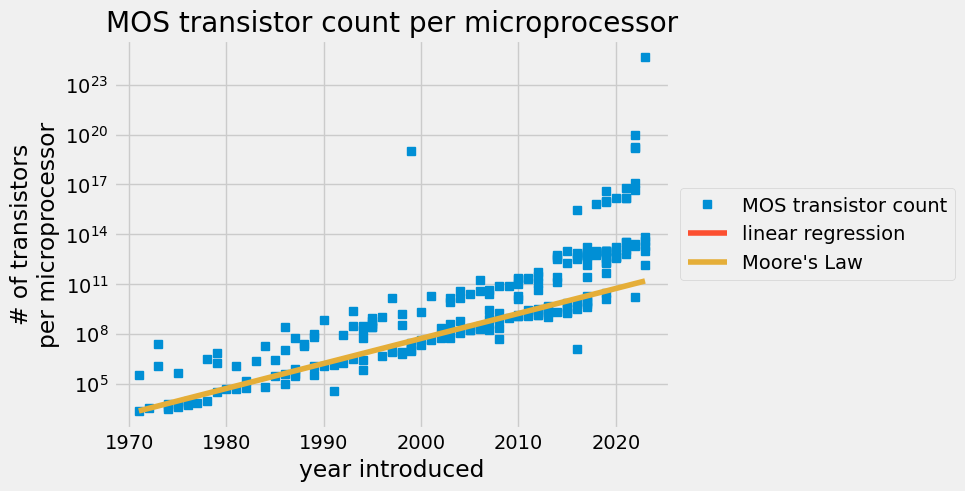

In [476]:
# Based upon your least-squares  regression model, the number of semiconductors per chip increased by a factor of 2.50 +/- 0.01 every two years. You have a model that predicts the number of semiconductors each year. Now compare your model to the actual manufacturing reports. Plot the linear regression results and all of the transister counts..


# Here use plt.semilogy to plot the number of transistors on a log-scale and the year on a linear scale. You have defined a three arrays to get to a final model


import matplotlib.pyplot as plt

transistor_count_predicted = np.exp(B) * np.exp(A * year)
transistor_Moores_law = Moores_law(year)
plt.style.use('fivethirtyeight')
plt.semilogy(year, transistor_count, "s", label="MOS transistor count")
plt.semilogy(year, transistor_count_predicted, label="linear regression")


plt.plot(year, transistor_Moores_law, label="Moore's Law")
plt.title("MOS transistor count per microprocessor")
plt.xlabel("year introduced")
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.ylabel("# of transistors\nper microprocessor")
plt.show()

In [480]:
len(transistor_count), len(year)

(229, 229)

In [479]:
transistor_count

1      2.250000e+03
2      3.078170e+05
3      3.500000e+03
4      2.500182e+07
5      1.100021e+06
           ...     
235    9.000000e+19
236    4.400000e+24
237    4.000000e+13
238    6.700000e+13
239    1.340000e+12
Name: Transistor_count, Length: 229, dtype: float64

In [ ]:
# Test for the year of 2017

transistor_count2017 = transistor_count[year==2017].values
print(
    transistor_count2017.max(), transistor_count2017.min(), transistor_count2017.mean()
)
y=np.linspace(2016.5, 2017.5)
your_model2017 = np.exp(B) * np.exp(A * y)

Moore_Model2017=Moores_law(y)